# 기초데이터과학 (01분반)

## 13-1. 시계열 데이터 분석 기초 (Time series analysis basic)

### Acknowledgement
#### 이 자료는 다음 서적의 내용을 바탕으로 작성되었음
- Do it! 데이터 분석을 위한 판다스 입문 (전면 개정판). 이지스 퍼블리싱
- 파이썬 라이브러리를 활용한 데이터 분석 (2판). 한빛미디어

### 시계열 데이터
- 시간의 흐름에 따라 관측된 값으로 구성된 데이터
- 특정 시간 간격으로 관측치가 기록되어 있음
  - 예: 주가 데이터, 유가 데이터, 기온/습도 등의 날씨 관측 데이터, 일별 전력 소비량, 코로나19 감염자 수 데이터, 일별 항공 승객수

#### 시계열 데이터의 특징

##### 시간 순서의 중요성
- 시계열 데이터는 시간 순서가 있으며 각 데이터 포인트는 특정 시간에 발생하여 이전 및 이후 값과의 시간적 의존성이 존재함
  - 예: 주가 데이터에서 오늘의 가격은 어제의 가격과 밀접한 관계가 있음

##### 데이터의 패턴 
- 시계열 데이터에는 다음과 같은 패턴이 존재할 수 있음
- 추세(Trend)
  - 정의: 데이터가 장기적으로 증가하거나 감소하는 경향
  - 예: 글로벌 기온 상승 (장기적 증가), 특정 제품 판매량 감소 (장기적 감소)
- 계절성(Seasonality)
  - 정의: 일정 주기(년, 분기, 월)로 반복되는 변동
  - 예: 매년 여름철 음료 판매량 증가, 전력 사용량이 하루 중 특정 시간대에 증가
- 주기성(Cycles)
  - 정의: 계절성과 달리 불규칙하거나 긴 주기(수 년)로 발생하는 반복(상승과 하락)
  - 예: 경제의 경기 순환 (호황과 불황), 특정 주기의 자연 현상 (예: 태양 흑점 활동)
- 불규칙성(Randomness)
  - 정의: 설명되지 않는 비정상적 변동
  - 예: 금융 시장의 갑작스러운 변동, 센서 데이터의 노이즈

##### 자기 상관성 (Autocorrelation)
- 시계열 데이터는 이전 값이 이후 값에 영향을 미칠 가능성이 높아 특정 시점의 데이터가 이전 시점의 데이터와 상관 관계를 가질 수 있음
- 연속된 데이터 포인트 간의 유사도를 나타냄
  - 예: 오늘의 날씨는 어제의 날씨와 상관성이 있음

##### 시간 간격의 중요성
- 시계열 데이터는 일정하거나 불규칙한 시간 간격으로 수집 될 수 있음
  - 일정 간격: 매분, 매시간, 매일
  - 불규칙 간격: 자연 현상 데이터 (지진 발생 시간)
- 분석 전에 시간 간격이 일정하지 않다면 시간 간격을 맞추기 위한 리샘플링이나 보간(Interpolation)이 필요할 수 있음

##### 데이터 양의 중요성
- 시계열 데이터는 일반적으로 관측값이 많아야 패턴을 안정적으로 파악할 수 있음
- 짧은 시계열 데이터는 추세 및 계절성을 분석하기 어려울 수 있음

### 시계열 데이터 전처리
#### 1. datetime 객체

- 날짜와 시간을 처리하는 다양한 기능을 제공하는 Python 라이브러리
- 주요 클래스
  - datetime.date: 날짜만 포함. 연, 월, 일 날짜를 저장
  - datetime.time: 시간만 포함. 하루의 시간을 시, 분, 초, 마이크로 초 단위로 저장
  - datetime.datetime: 날짜와 시간을 포함한 객체
  - datetime.timedelta: 두 datetime 객체의 시간 차이(일, 초, 마이크로 초) 표현

In [44]:
from datetime import datetime

In [45]:
# now() 함수: 현재 날짜와 시간 정보 확인
now = datetime.now()
print(now)

2025-11-25 09:48:23.892189


In [46]:
t1 = datetime.now()

# 특정 날짜와 시각으로 datetime 객체를 생성할 수 있음
t2 = datetime(1970, 1, 1) # 년, 월, 일

print(t1)
print(t2)

2025-11-25 09:48:23.917669
1970-01-01 00:00:00


In [47]:
# 뺄셈 연산으로 두 datetime 객체 간의 시간 간격 계산 가능
diff = t1 - t2 
print(diff)

20417 days, 9:48:23.917669


In [48]:
print(type(diff))

<class 'datetime.timedelta'>


#### 2. datetime으로 변환하기
- pandas의 to_datetime() 함수
  - object 형 문자열 객체를 datetime 객체로 변환할 수 있음

##### 예제 데이터
- 에볼라 바이러스 감염자 및 사망자 수 데이터

In [49]:
import pandas as pd

ebola = pd.read_csv('country_timeseries.csv')

print(ebola)

           Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0      1/5/2015  289        2776.0            NaN            10030.0   
1      1/4/2015  288        2775.0            NaN             9780.0   
2      1/3/2015  287        2769.0         8166.0             9722.0   
3      1/2/2015  286           NaN         8157.0                NaN   
4    12/31/2014  284        2730.0         8115.0             9633.0   
..          ...  ...           ...            ...                ...   
117   3/27/2014    5         103.0            8.0                6.0   
118   3/26/2014    4          86.0            NaN                NaN   
119   3/25/2014    3          86.0            NaN                NaN   
120   3/24/2014    2          86.0            NaN                NaN   
121   3/22/2014    0          49.0            NaN                NaN   

     Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
0              NaN            NaN                 NaN          Na

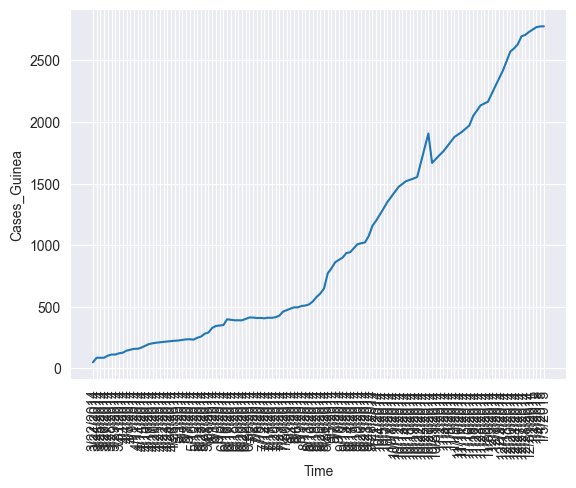

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

guinea = ebola[['Date', 'Cases_Guinea']]

guinea = guinea.sort_index(ascending=False) # 날짜 순서를 변경해주기 위해서 sort_index() 함수 사용

sns.lineplot(data=guinea, x='Date', y='Cases_Guinea')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Cases_Guinea')
plt.show()

In [51]:
print(ebola.info())

# Date 컬럼(변수)의 자료형은 object 형임을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [52]:
# Date 컬럼을 to_datetime() 함수를 이용하여 datetime 객체로 변환하고 새로운 컬럼 date_dt 컬럼으로 저장
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

print(ebola.head())

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0          

In [53]:
print(ebola.info())

# 마지막 19번째 컬럼으로 date_dt가 추가되었고 Dtype(자료형)은 datetime64임을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [54]:
# format 매개변수를 이용하여 데이터의 날짜 형식을 지정할 수 있음. Date 컬럼의 데이터는 월/일/년 형식이므로 %m/%d/%Y로 지정
ebola['date_dt'] = pd.to_datetime(ebola['Date'], format='%m/%d/%Y')

# %m: 2자리 월 (01~12)
# %d: 2자리 일 (01~31)
# %Y: 4자리 연도
# %y: 2자리 연도
# 그 외 시, 분 초, 주차, 시간대 등을 표현하는 규칙 있음
# %H: 시간(24시간 형식. 00~23), %I: 시간(12시간 형식. 01~12), %M: 2자리 분 (00~59), %S: 초 (00~61. 60, 61은 윤초)

print(ebola.head())

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0          

In [55]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

#### 3. 시계열 데이터 불러오기
- read_csv() 함수는 parse_dates, keep_date_col, date_parser, dayfirst 등 시계열 데이터를 처리하는 다양한 매개변수를 제공함
- parse_dates 매개변수에 원하는 컬럼 이름을 지정하면 데이터를 읽어올 때 datetime 형으로 처음부터 변환하여 불러올 수 있음

In [56]:
ebola = pd.read_csv('country_timeseries.csv', parse_dates=["Date"])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

#### 4. 시간 정보 추출하기
- datetime 객체에서 연, 월, 일과 같은 시간 정보 요소를 따로 추출할 수 있음

In [57]:
# to_datetime() 함수에 일시를 나타내는 문자열을 전달하면 Timestamp 객체를 반환함
d = pd.to_datetime('2021-12-14') 
print(d)
print(type(d))

2021-12-14 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


- Timestamp 객체의 year, month, day 속성으로 연, 월, 일 값을 읽을 수 있음

In [58]:
print(d.year)
print(d.month)
print(d.day)

2021
12
14


In [59]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola[['Date', 'date_dt']])

          Date    date_dt
0   2015-01-05 2015-01-05
1   2015-01-04 2015-01-04
2   2015-01-03 2015-01-03
3   2015-01-02 2015-01-02
4   2014-12-31 2014-12-31
..         ...        ...
117 2014-03-27 2014-03-27
118 2014-03-26 2014-03-26
119 2014-03-25 2014-03-25
120 2014-03-24 2014-03-24
121 2014-03-22 2014-03-22

[122 rows x 2 columns]


- datetime 객체의 dt.year 속성으로 연도 값을 읽을 수 있음

In [60]:
ebola['year'] = ebola['date_dt'].dt.year # dt.year 속성으로 연도 값을 읽고 그것을 year라는 새로운 컬럼으로 저장
print(ebola[['Date', 'date_dt', 'year']])

          Date    date_dt  year
0   2015-01-05 2015-01-05  2015
1   2015-01-04 2015-01-04  2015
2   2015-01-03 2015-01-03  2015
3   2015-01-02 2015-01-02  2015
4   2014-12-31 2014-12-31  2014
..         ...        ...   ...
117 2014-03-27 2014-03-27  2014
118 2014-03-26 2014-03-26  2014
119 2014-03-25 2014-03-25  2014
120 2014-03-24 2014-03-24  2014
121 2014-03-22 2014-03-22  2014

[122 rows x 3 columns]


- dt.year와 마찬가지로 dt.month, dt.day 속성으로 월, 일 값을 읽을 수 있음

In [61]:
# 아래 코드는 월, 일 값을 읽고 그것을 month, day라는 새로운 컬럼으로 저장
ebola = ebola.assign(
    month=ebola["date_dt"].dt.month,
    day=ebola["date_dt"].dt.day
)

print(ebola[['Date', 'date_dt', 'year', 'month', 'day']])

          Date    date_dt  year  month  day
0   2015-01-05 2015-01-05  2015      1    5
1   2015-01-04 2015-01-04  2015      1    4
2   2015-01-03 2015-01-03  2015      1    3
3   2015-01-02 2015-01-02  2015      1    2
4   2014-12-31 2014-12-31  2014     12   31
..         ...        ...   ...    ...  ...
117 2014-03-27 2014-03-27  2014      3   27
118 2014-03-26 2014-03-26  2014      3   26
119 2014-03-25 2014-03-25  2014      3   25
120 2014-03-24 2014-03-24  2014      3   24
121 2014-03-22 2014-03-22  2014      3   22

[122 rows x 5 columns]


In [62]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

#### 5. 시간 간격 계산하기

In [63]:
print(ebola.iloc[-5:, :5]) # 마지막 5개 행에서 처음 5개 열을 추출

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


- 에볼라 데이터셋은 발병 이후 날짜에 따라 전염병의 현황을 집계한 데이터로 Day 열은 전염병이 처음 발생한 날로부터 며칠이 지났는지를 나타냄

In [64]:
print(ebola['date_dt'].min())

2014-03-22 00:00:00


- 발병 첫날, 즉 데이터셋에서 가장 오래된 날짜와 Date 열의 각 날짜의 차이를 계산하면 Day 열과 같은 값을 구할 수 있음

In [65]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min() # datetime 객체 간의 차이를 계산

print(ebola[['Date', 'Day', 'outbreak_d']])

          Date  Day outbreak_d
0   2015-01-05  289   289 days
1   2015-01-04  288   288 days
2   2015-01-03  287   287 days
3   2015-01-02  286   286 days
4   2014-12-31  284   284 days
..         ...  ...        ...
117 2014-03-27    5     5 days
118 2014-03-26    4     4 days
119 2014-03-25    3     3 days
120 2014-03-24    2     2 days
121 2014-03-22    0     0 days

[122 rows x 3 columns]


In [66]:
print(ebola.info())

# outbreak_d 컬럼의 자료형은 timedelta64 형임을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    datetime64[ns] 
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

#### 6. 시간 인덱스 설정 및 시간별 데이터 추출하기
- 시간을 나타내는 컬럼(변수)를 인덱스로 설정하여 분석에 이용할 수 있음

In [67]:
ebola = pd.read_csv('country_timeseries.csv', parse_dates=["Date"])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [68]:
# 현재 인덱스는 기본 인덱스로 0부터 122까지 숫자
print(ebola.index)

RangeIndex(start=0, stop=122, step=1)


In [69]:
# datetime 자료형인 Date 컬럼을 인덱스로 설정
ebolaDateIndex = ebola.set_index('Date')

# 인덱스 변경하지 않은 ebola 객체의 첫 5개 행, 5개 열을 출력
print(ebola.iloc[:5, :5])

print('=================')

# 인덱스를 변경한 ebolaDateIndex 객체의 첫 5개 행, 5개 열을 출력
print(ebolaDateIndex.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria
Date                                                                          
2015-01-05  289        2776.0            NaN            10030.0            NaN
2015-01-04  288        2775.0            NaN             9780.0            NaN
2015-01-03  287        2769.0         8166.0             9722.0            NaN
2015-01-02  286           NaN         8157.0                NaN            NaN
2014-12-31  284        2730.0         8115.0             9633.0            NaN


In [70]:
print(ebolaDateIndex.index)

DatetimeIndex(['2015-01-05', '2015-01-04', '2015-01-03', '2015-01-02',
               '2014-12-31', '2014-12-28', '2014-12-27', '2014-12-24',
               '2014-12-21', '2014-12-20',
               ...
               '2014-04-04', '2014-04-01', '2014-03-31', '2014-03-29',
               '2014-03-28', '2014-03-27', '2014-03-26', '2014-03-25',
               '2014-03-24', '2014-03-22'],
              dtype='datetime64[ns]', name='Date', length=122, freq=None)


- 위 출력 결과에서 DataFrame 객체인 ebolaDateIndex의 인덱스가 DatetimeIndex 객체이고, 각 인덱스 값의 자료형은 datetime64 임을 알 수 있음

In [71]:
# 2015년 데이터만 추출
print(ebolaDateIndex.loc['2015'])

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                              
2015-01-05  289        2776.0            NaN            10030.0   
2015-01-04  288        2775.0            NaN             9780.0   
2015-01-03  287        2769.0         8166.0             9722.0   
2015-01-02  286           NaN         8157.0                NaN   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2015-01-05            NaN            NaN                 NaN          NaN   
2015-01-04            NaN            NaN                 NaN          NaN   
2015-01-03            NaN            NaN                 NaN          NaN   
2015-01-02            NaN            NaN                 NaN          NaN   

            Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
Date                                                     

In [72]:
# 2014년 12월 데이터만 추출
print(ebolaDateIndex.loc['2014-12'])

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                              
2014-12-31  284        2730.0         8115.0             9633.0   
2014-12-28  281        2706.0         8018.0             9446.0   
2014-12-27  280        2695.0            NaN             9409.0   
2014-12-24  277        2630.0         7977.0             9203.0   
2014-12-21  273        2597.0            NaN             9004.0   
2014-12-20  272        2571.0         7862.0             8939.0   
2014-12-18  271           NaN         7830.0                NaN   
2014-12-14  267        2416.0            NaN             8356.0   
2014-12-09  262           NaN         7797.0                NaN   
2014-12-07  260        2292.0            NaN             7897.0   
2014-12-03  256           NaN         7719.0                NaN   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                               

In [73]:
# 2014년 03월 31일 데이터만 추출
print(ebolaDateIndex.loc['2014-03-31'])

Day                      9.0
Cases_Guinea           122.0
Cases_Liberia            8.0
Cases_SierraLeone        2.0
Cases_Nigeria            NaN
Cases_Senegal            NaN
Cases_UnitedStates       NaN
Cases_Spain              NaN
Cases_Mali               NaN
Deaths_Guinea           80.0
Deaths_Liberia           4.0
Deaths_SierraLeone       2.0
Deaths_Nigeria           NaN
Deaths_Senegal           NaN
Deaths_UnitedStates      NaN
Deaths_Spain             NaN
Deaths_Mali              NaN
Name: 2014-03-31 00:00:00, dtype: float64


- TimedeltaIndex 활용
  - 두 datetime 객체의 시간 차이를 나타내는 변수를 인덱스로 이용 가능

In [74]:
ebola['ref_date'] = ebola['Date'] - ebola['Date'].min() # datetime 객체 간의 차이를 계산하여 ref_date라는 컬럼(변수)으로 저장

In [75]:
ebola.index = ebola['ref_date'] # ref_date 컬럼을 인덱스로 설정
# set_index() 함수를 사용할 수도 있음

print(ebola.head())

               Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
ref_date                                                                   
289 days 2015-01-05  289        2776.0            NaN            10030.0   
288 days 2015-01-04  288        2775.0            NaN             9780.0   
287 days 2015-01-03  287        2769.0         8166.0             9722.0   
286 days 2015-01-02  286           NaN         8157.0                NaN   
284 days 2014-12-31  284        2730.0         8115.0             9633.0   

          Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
ref_date                                                                  
289 days            NaN            NaN                 NaN          NaN   
288 days            NaN            NaN                 NaN          NaN   
287 days            NaN            NaN                 NaN          NaN   
286 days            NaN            NaN                 NaN          NaN   
284 days         

In [76]:
print(ebola.index) 

TimedeltaIndex(['289 days', '288 days', '287 days', '286 days', '284 days',
                '281 days', '280 days', '277 days', '274 days', '273 days',
                ...
                 '13 days',  '10 days',   '9 days',   '7 days',   '6 days',
                  '5 days',   '4 days',   '3 days',   '2 days',   '0 days'],
               dtype='timedelta64[ns]', name='ref_date', length=122, freq=None)


- 위의 출력 결과에서 DateFrame 객체 ebola의 index는 TimedeltaIndex 객체이고 각 인덱스 값의 자료형은 timedelta64임을 알 수 있음

- TimedeltaIndex를 이용한 데이터 추출

In [77]:
# 발병 289일부터 280일 사이 데이터 추출
print(ebola.loc['289 day' : '280 day'])

               Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
ref_date                                                                   
289 days 2015-01-05  289        2776.0            NaN            10030.0   
288 days 2015-01-04  288        2775.0            NaN             9780.0   
287 days 2015-01-03  287        2769.0         8166.0             9722.0   
286 days 2015-01-02  286           NaN         8157.0                NaN   
284 days 2014-12-31  284        2730.0         8115.0             9633.0   
281 days 2014-12-28  281        2706.0         8018.0             9446.0   

          Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
ref_date                                                                  
289 days            NaN            NaN                 NaN          NaN   
288 days            NaN            NaN                 NaN          NaN   
287 days            NaN            NaN                 NaN          NaN   
286 days        

In [78]:
# 발병 5일부터 0일 사이 데이터 추출
print(ebola.loc['5 day' : ])

               Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
ref_date                                                                   
5 days   2014-03-27    5         103.0            8.0                6.0   
4 days   2014-03-26    4          86.0            NaN                NaN   
3 days   2014-03-25    3          86.0            NaN                NaN   
2 days   2014-03-24    2          86.0            NaN                NaN   
0 days   2014-03-22    0          49.0            NaN                NaN   

          Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
ref_date                                                                  
5 days              NaN            NaN                 NaN          NaN   
4 days              NaN            NaN                 NaN          NaN   
3 days              NaN            NaN                 NaN          NaN   
2 days              NaN            NaN                 NaN          NaN   
0 days           

#### 7. 리샘플링(resampling) 수행하기
- 리샘플링: 시계열 데이터의 빈도(시간 주기)를 변환하는 과정

##### 리샘플링의 종류
- 다운샘플링 (Downsampling): 상위 빈도의 데이터를 하위 빈도로 집계하는 것
  - 예: 초 단위 데이터를 분 단위 데이터로 변환, 일별 데이터를 월별 데이터로 변환

- 업샘플링 (Upsampling): 하위 빈도의 데이터를 상위 빈도로 변환하는 것. 값 보간(interpolation) 필요
  - 예: 일별 데이터를 시간별 데이터로 변환
 
- 주기 변경 없는 리샘플링: 빈도는 변경하지 않고 세부 설정만 변경하는 것
  - 예: 매주 월요일에서 매주 금요일

##### 리샘플링 활용 사례
- 데이터의 노이즈를 줄이고 패턴을 요약하기 위해 다운샘플링 수행
- 누락된 데이터를 보간하거나 분석을 위한 정렬을 위해 업샘플링 수행
- 주기성 데이터 분석: 주별, 월별, 분기별, 연도별로 데이터 집계

##### pandas의 리샘플링 기능
- resample() 함수 활용
  - resample() 함수의 입력으로 원하는 시간 주기를 전달하여 인덱스의 시간 주기를 변경할 수 있음
  - 예: 일 단위로 되어 있는 데이터를 월 단위로 변경하면서 평균이나 합 등으로 요약

In [79]:
ebola = pd.read_csv('country_timeseries.csv', parse_dates=["Date"])
ebola = ebola.set_index('Date')

print(ebola.head())

            Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                              
2015-01-05  289        2776.0            NaN            10030.0   
2015-01-04  288        2775.0            NaN             9780.0   
2015-01-03  287        2769.0         8166.0             9722.0   
2015-01-02  286           NaN         8157.0                NaN   
2014-12-31  284        2730.0         8115.0             9633.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2015-01-05            NaN            NaN                 NaN          NaN   
2015-01-04            NaN            NaN                 NaN          NaN   
2015-01-03            NaN            NaN                 NaN          NaN   
2015-01-02            NaN            NaN                 NaN          NaN   
2014-12-31            NaN            NaN                 NaN        

- 다운샘플링 예제 1
  - 에볼라 발병 데이터에서 일별 데이터를 평균으로 집계하여 월 단위로 변경

In [80]:
down = ebola.resample('ME').mean() 
# ME: 월 주기(매월 말일)로 설정

print(down.iloc[:, :4]) # 4개 열만 추출하여 출력

                   Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                  
2014-03-31    4.500000     94.500000       6.500000           3.333333
2014-04-30   24.333333    177.818182      24.555556           2.200000
2014-05-31   51.888889    248.777778      12.555556           7.333333
2014-06-30   84.636364    373.428571      35.500000         125.571429
2014-07-31  115.700000    423.000000     212.300000         420.500000
2014-08-31  145.090909    559.818182     868.818182         844.000000
2014-09-30  177.500000    967.888889    2815.625000        1726.000000
2014-10-31  207.470588   1500.444444    4758.750000        3668.111111
2014-11-30  237.214286   1950.500000    7039.000000        5843.625000
2014-12-31  271.181818   2579.625000    7902.571429        8985.875000
2015-01-31  287.500000   2773.333333    8161.500000        9844.000000


- 다운샘플링 예제 2

In [81]:
down2 = ebola.resample('MS').mean() 
# MS: 월 주기(매월 1일)로 설정

print(down2.iloc[:, :4]) # 4개 열만 추출하여 출력

                   Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                  
2014-03-01    4.500000     94.500000       6.500000           3.333333
2014-04-01   24.333333    177.818182      24.555556           2.200000
2014-05-01   51.888889    248.777778      12.555556           7.333333
2014-06-01   84.636364    373.428571      35.500000         125.571429
2014-07-01  115.700000    423.000000     212.300000         420.500000
2014-08-01  145.090909    559.818182     868.818182         844.000000
2014-09-01  177.500000    967.888889    2815.625000        1726.000000
2014-10-01  207.470588   1500.444444    4758.750000        3668.111111
2014-11-01  237.214286   1950.500000    7039.000000        5843.625000
2014-12-01  271.181818   2579.625000    7902.571429        8985.875000
2015-01-01  287.500000   2773.333333    8161.500000        9844.000000


- 다운샘플링 예제 3
  - 에볼라 발병 데이터에서 일별 데이터를 주 단위 합계로 변경

In [82]:
downWeek = ebola.resample('W').sum()
# W: 주 단위로 설정

print(downWeek.iloc[:, :4])

             Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                            
2014-03-23     0          49.0            0.0                0.0
2014-03-30    27         585.0           18.0                8.0
2014-04-06    32         392.0           34.0                6.0
2014-04-13    54         468.0           72.0                6.0
2014-04-20   127         776.0           54.0               12.0
2014-04-27   161         442.0           69.0                0.0
2014-05-04    82         457.0           26.0                0.0
2014-05-11   139         704.0           38.0                0.0
2014-05-18    51         248.0           12.0                0.0
2014-05-25    62         258.0           12.0                0.0
2014-06-01   204         900.0           38.0              145.0
2014-06-08   148         344.0           26.0               81.0
2014-06-15    80         351.0           13.0               89.0
2014-06-22   532        1

- 업샘플링 예제 1
  - 위 다운샘플링 예제 1의 월 단위 데이터를 업샘플링 하여 일별 데이터로 변경
  - 존재하지 않는 데이터는 NaN으로 채움

In [83]:
up = down.resample('D').asfreq() 
# D: 일 주기
# asfreq() 함수: 리샘플링 후 집계나 계산 없이 값이 존재하는 시간에만 값을 유지하고, 없는 시간 간격은 NaN으로 채움

print(up.loc['2014-04', 'Day':'Cases_Guinea'])

                  Day  Cases_Guinea
Date                               
2014-04-01        NaN           NaN
2014-04-02        NaN           NaN
2014-04-03        NaN           NaN
2014-04-04        NaN           NaN
2014-04-05        NaN           NaN
2014-04-06        NaN           NaN
2014-04-07        NaN           NaN
2014-04-08        NaN           NaN
2014-04-09        NaN           NaN
2014-04-10        NaN           NaN
2014-04-11        NaN           NaN
2014-04-12        NaN           NaN
2014-04-13        NaN           NaN
2014-04-14        NaN           NaN
2014-04-15        NaN           NaN
2014-04-16        NaN           NaN
2014-04-17        NaN           NaN
2014-04-18        NaN           NaN
2014-04-19        NaN           NaN
2014-04-20        NaN           NaN
2014-04-21        NaN           NaN
2014-04-22        NaN           NaN
2014-04-23        NaN           NaN
2014-04-24        NaN           NaN
2014-04-25        NaN           NaN
2014-04-26        NaN       

- 업샘플링 예제 2
  - 위 다운샘플링 예제 3의 주 단위 데이터를 업샘플링 하여 일별 데이터로 변경
  - 존재하지 않는 데이터는 NaN으로 채움

In [84]:
upDay = downWeek.resample('D').asfreq()


print(upDay.iloc[:10, :4]) # 첫 10개 행, 4개 열만 추출

             Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                            
2014-03-23   0.0          49.0            0.0                0.0
2014-03-24   NaN           NaN            NaN                NaN
2014-03-25   NaN           NaN            NaN                NaN
2014-03-26   NaN           NaN            NaN                NaN
2014-03-27   NaN           NaN            NaN                NaN
2014-03-28   NaN           NaN            NaN                NaN
2014-03-29   NaN           NaN            NaN                NaN
2014-03-30  27.0         585.0           18.0                8.0
2014-03-31   NaN           NaN            NaN                NaN
2014-04-01   NaN           NaN            NaN                NaN


- 비어있는 데이터(NaN)를 선형 보간(linear interpolation) 방법으로 값을 채움
  - 주어진 두 점 사이를 직선으로 연결하여 중간 값을 계산하는 방식
  - 선형 보간은 데이터의 결측값을 채우는 빠르고 간단한 방식이나 두 데이터 사이의 값이 비선형 관계인 경우 정확도가 떨어질 수 있음

In [85]:
lin_upDay = upDay.interpolate(method='linear')

print(lin_upDay.iloc[:10, :4])

                  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                 
2014-03-23   0.000000     49.000000       0.000000           0.000000
2014-03-24   3.857143    125.571429       2.571429           1.142857
2014-03-25   7.714286    202.142857       5.142857           2.285714
2014-03-26  11.571429    278.714286       7.714286           3.428571
2014-03-27  15.428571    355.285714      10.285714           4.571429
2014-03-28  19.285714    431.857143      12.857143           5.714286
2014-03-29  23.142857    508.428571      15.428571           6.857143
2014-03-30  27.000000    585.000000      18.000000           8.000000
2014-03-31  27.714286    557.428571      20.285714           7.714286
2014-04-01  28.428571    529.857143      22.571429           7.428571


- 비선형 보간 방법으로 Polynomial, Spline interpolation(보간) 방법 등이 있음
  - Polynomial(다항식) 보간: 두 데이터 사이 값을 잘 근사하는 n차 다항식을 생성하고 이를 이용해 결측값을 추정하는 방법
  - Spline 보간: 구간별로 여러 개의 저차 다항식을 사용하여 값을 추정하는 방법. 각 구간의 곡선이 부드럽게 연결될 수 있음

In [86]:
pol_upDay = upDay.interpolate(method='polynomial', order=2) # 다항식 보간 방법으로 보간 실행

print(pol_upDay.iloc[:10, :4])

                  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                 
2014-03-23   0.000000     49.000000       0.000000           0.000000
2014-03-24   5.531341    180.432066       3.120102           1.864815
2014-03-25  10.504616    293.577253       6.057312           3.488977
2014-03-26  14.919824    388.435560       8.811632           4.872486
2014-03-27  18.776967    465.006989      11.383061           6.015343
2014-03-28  22.076044    523.291538      13.771598           6.917548
2014-03-29  24.817055    563.289209      15.977245           7.579100
2014-03-30  27.000000    585.000000      18.000000           8.000000
2014-03-31  28.624879    588.423912      19.839864           8.180247
2014-04-01  29.691692    573.560945      21.496838           8.119842


In [87]:
pol_upDay = upDay.interpolate(method='spline', order=3) # 스플라인 보간 방법으로 보간 실행

print(pol_upDay.iloc[:10, :4])

                  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                 
2014-03-23   0.000000     49.000000       0.000000           0.000000
2014-03-24   6.471642    214.791205       5.272938           2.300126
2014-03-25  11.909906    345.126619       9.314047           4.183833
2014-03-26  16.411653    443.436368      12.322352           5.652195
2014-03-27  20.074365    513.149832      14.496315           6.744835
2014-03-28  22.995526    557.696387      16.034396           7.501377
2014-03-29  25.272618    580.505411      17.135056           7.961446
2014-03-30  27.000000    585.000000      18.000000           8.000000
2014-03-31  28.284531    574.628380      18.817960           8.150660
2014-04-01  29.214318    552.801079      19.797125           7.959053
